In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#from main import numero_sim


numero_sim = 1
sim_dir = f"../data/sims/sim{numero_sim}"

# Besoins en chaud et en froid

In [118]:
chaud_froid = pd.read_csv(f"{sim_dir}/inputs/puissance_chaud_froid.csv", delimiter=",", skiprows=[1,2])

chaud_froid = chaud_froid.drop(axis=1, labels=[f"Unnamed: {i}" for i in range(0,24,2)])
chaud_froid.sort_index(axis=1, inplace=True)
legends = ['A1 bureau', 'A1 habitations', 'A3', 'B2 bureau', 'B2 habitations',
           'C1 dépôt', 'C1 habitations', 'C1 restauration', 'C2 bureau', 'C2 habitations',
           'D1 ferme', 'D2 dépôt']
SRE = [9450, 1890, 17010, 10800, 2700, 1350, 675, 675, 4050, 1350, 855,900]
for i in range(0,len(SRE)):
    chaud_froid.iloc[:,i] = chaud_froid.iloc[:,i] * SRE[i]

<AxesSubplot:>

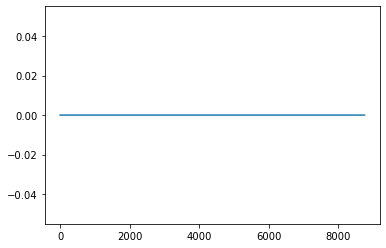

In [119]:
froid = chaud_froid[chaud_froid.lt(0)].sum(axis=1)
chaud = chaud_froid[chaud_froid.gt(0)].sum(axis=1)
maj = chaud_froid.sum(axis=1)
#chaud.plot()
#froid.plot()
(maj-chaud-froid).plot()
#chaud_froid.to_csv("chaud_froid.csv")

258552.0

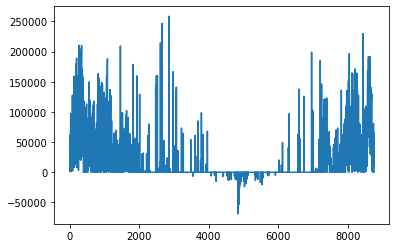

In [120]:
#(chaud_froid.lt(0) or chaud_froid.gt(0)).sum(axis=1).sum()
(chaud+ froid).plot()
chaud.max()

# Production solaire PV et thermique

<AxesSubplot:>

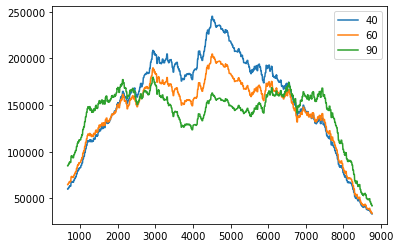

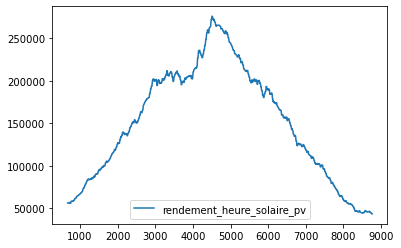

In [121]:
sol_pv = pd.read_csv(f"{sim_dir}/inputs/solaire_pv.csv", comment="#")

sol_th = pd.read_csv(f"{sim_dir}/inputs/solaire_thermique.csv", comment="#", delimiter=";")

surface_toiture = 11850 # m2

prop_pv = 0.8
prop_th = 0.2
sol_th = sol_th.iloc[:8761,1:4]
prod_sol_th = sol_th*prop_th*surface_toiture
prod_sol_pv = sol_pv*prop_pv*surface_toiture
prod_sol_th.rolling(window=24*7*4).sum().plot()
prod_sol_pv.rolling(window=24*7*4).sum().plot()

# Eau chaude sanitaire

<AxesSubplot:xlabel='heure'>

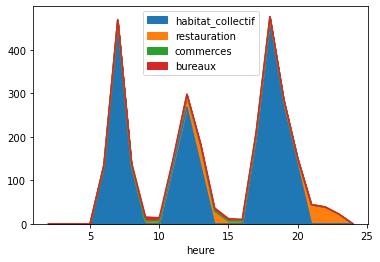

In [122]:
ecs = pd.read_csv(f"{sim_dir}/inputs/ecs.csv", delimiter=";", index_col=0)
ecs.sum(axis=1).sum()
ecs.iloc[1:24].plot.area(stacked=True)

# Production Hydraulique

In [123]:
hydro = pd.read_csv(f"{sim_dir}/inputs/hydro.csv", delimiter=";", comment="#")
#hydro = pd.DataFrame([0 for i in range(0,8761)])
hydro

,Puissance hydroélectrique
0,61.62076
1,61.62076
2,61.62076
3,61.62076
4,61.62076
...,...
8755,62.90708
8756,62.90708
8757,62.90708
8758,62.90708


# Consommation électrique

In [124]:
ele=pd.read_csv(f"{sim_dir}/inputs/ele.csv", delimiter=";", comment="#")

In [125]:

final = pd.DataFrame(froid)
final["heure"] = pd.DataFrame([i for i in range(1,8761)])
final.set_index(keys="heure", inplace=True)
final["prodPV"] = prod_sol_pv
final["prodHydro"] = hydro
final["prodSolTh"] = prod_sol_th["60"]

final["consChal"] = chaud / 1000
final["consECS"] = ecs.sum(axis=1)
final["consFroid"] = - froid/1000
final["consElec"] = ele
final.drop(columns=0, inplace=True)
final.to_csv(f"{sim_dir}/input_data.csv", na_rep=0)
final.to_numpy(na_value=0,)

array([[ 0.        , 61.62076   ,  0.        , ...,  0.        ,
        -0.        , 27.33488862],
       [ 0.        , 61.62076   ,  0.        , ...,  0.        ,
        -0.        , 27.33488862],
       [ 0.        , 61.62076   ,  0.        , ...,  0.        ,
        -0.        , 27.33488862],
       ...,
       [ 0.        , 62.90708   ,  0.        , ..., 38.69524853,
        -0.        , 51.46311826],
       [ 0.        , 62.90708   ,  0.        , ..., 22.11157059,
        -0.        , 49.43843627],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 28.59930404]])

In [126]:
final["consECS"].max(), final["consChal"].max()


(475.9954290756302, 258.552)